<a href="https://colab.research.google.com/github/ppxrj/Breast-Cancer-MLiS1/blob/main/Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VS keeps crashing- code moved to here

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
#from collections import Counter
%pip install ucimlrepo

In [159]:
#Dataset
from ucimlrepo import fetch_ucirepo
cancer_data = fetch_ucirepo(id=17) # fetch dataset
# data (as pandas dataframes)
X = cancer_data.data.features
y = cancer_data.data.targets
ids= cancer_data.data.ids

# Check the shape of data
print(f"Features shape: {X.shape}") #Features shape:  (569, 30)
print(f"Target shape: {y.shape}") #Target shape: (569, 1)
print(f"IDs shape: {ids.shape}") #IDs shape: (569, 1)
# Look at data
print(X.head())

Features shape: (569, 30)
Target shape: (569, 1)
IDs shape: (569, 1)
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   are

In [160]:
print(y.head())
print(ids.head())
print (y.value_counts()) # Check target distribution: 357 benign (2), 212 malignant (4)
print(X.isnull().sum())# Check for missing values
print("ID CHECK")
print(ids.isnull().sum())# Check for missing values in ids column

  Diagnosis
0         M
1         M
2         M
3         M
4         M
         ID
0    842302
1    842517
2  84300903
3  84348301
4  84358402
Diagnosis
B            357
M            212
Name: count, dtype: int64
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64
ID CHECK
ID    0
dtype: int64


In [161]:
# Basic statistics
print("DATA STATS")
print(X.info()) #all float
print(X.describe()) # count, mean, std, min, 25%, 50%, 75%, max for each feature

DATA STATS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 1

In [162]:
print(y.describe()) #569

       Diagnosis
count        569
unique         2
top            B
freq         357


Data Cleaning

In [163]:
print((X.isnull().sum()/ len(X))) #no empty values
duplicate_check=X.duplicated().any() # Check for duplicate rows
print(f"Are there duplicate rows? {duplicate_check}")

radius1               0.0
texture1              0.0
perimeter1            0.0
area1                 0.0
smoothness1           0.0
compactness1          0.0
concavity1            0.0
concave_points1       0.0
symmetry1             0.0
fractal_dimension1    0.0
radius2               0.0
texture2              0.0
perimeter2            0.0
area2                 0.0
smoothness2           0.0
compactness2          0.0
concavity2            0.0
concave_points2       0.0
symmetry2             0.0
fractal_dimension2    0.0
radius3               0.0
texture3              0.0
perimeter3            0.0
area3                 0.0
smoothness3           0.0
compactness3          0.0
concavity3            0.0
concave_points3       0.0
symmetry3             0.0
fractal_dimension3    0.0
dtype: float64
Are there duplicate rows? False


Outliers

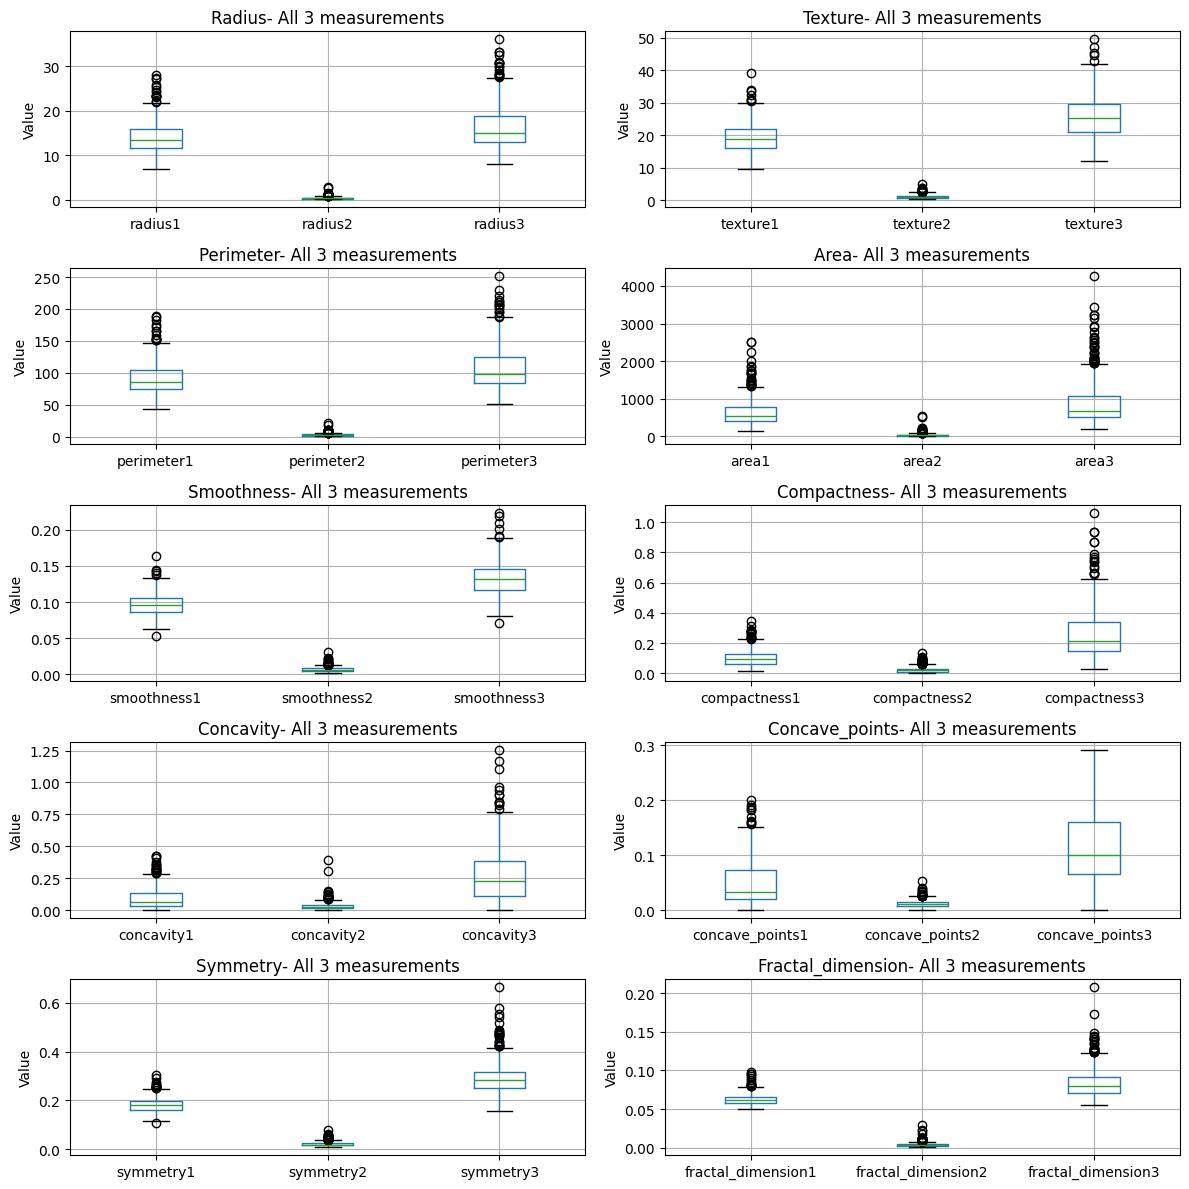

In [164]:
# Boxplots
feature_list=['radius','texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']
fig, axes= plt.subplots(5,2, figsize=(12,12))
axes= axes.flatten()

for i, feature in enumerate(feature_list):
  col_plot=[f'{feature}1', f'{feature}2', f'{feature}3']
  X[col_plot].boxplot(ax=axes[i])
  axes[i].set_title(f'{feature.capitalize()}- All 3 measurements', fontsize=12)
  axes[i].set_ylabel('Value')
  axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

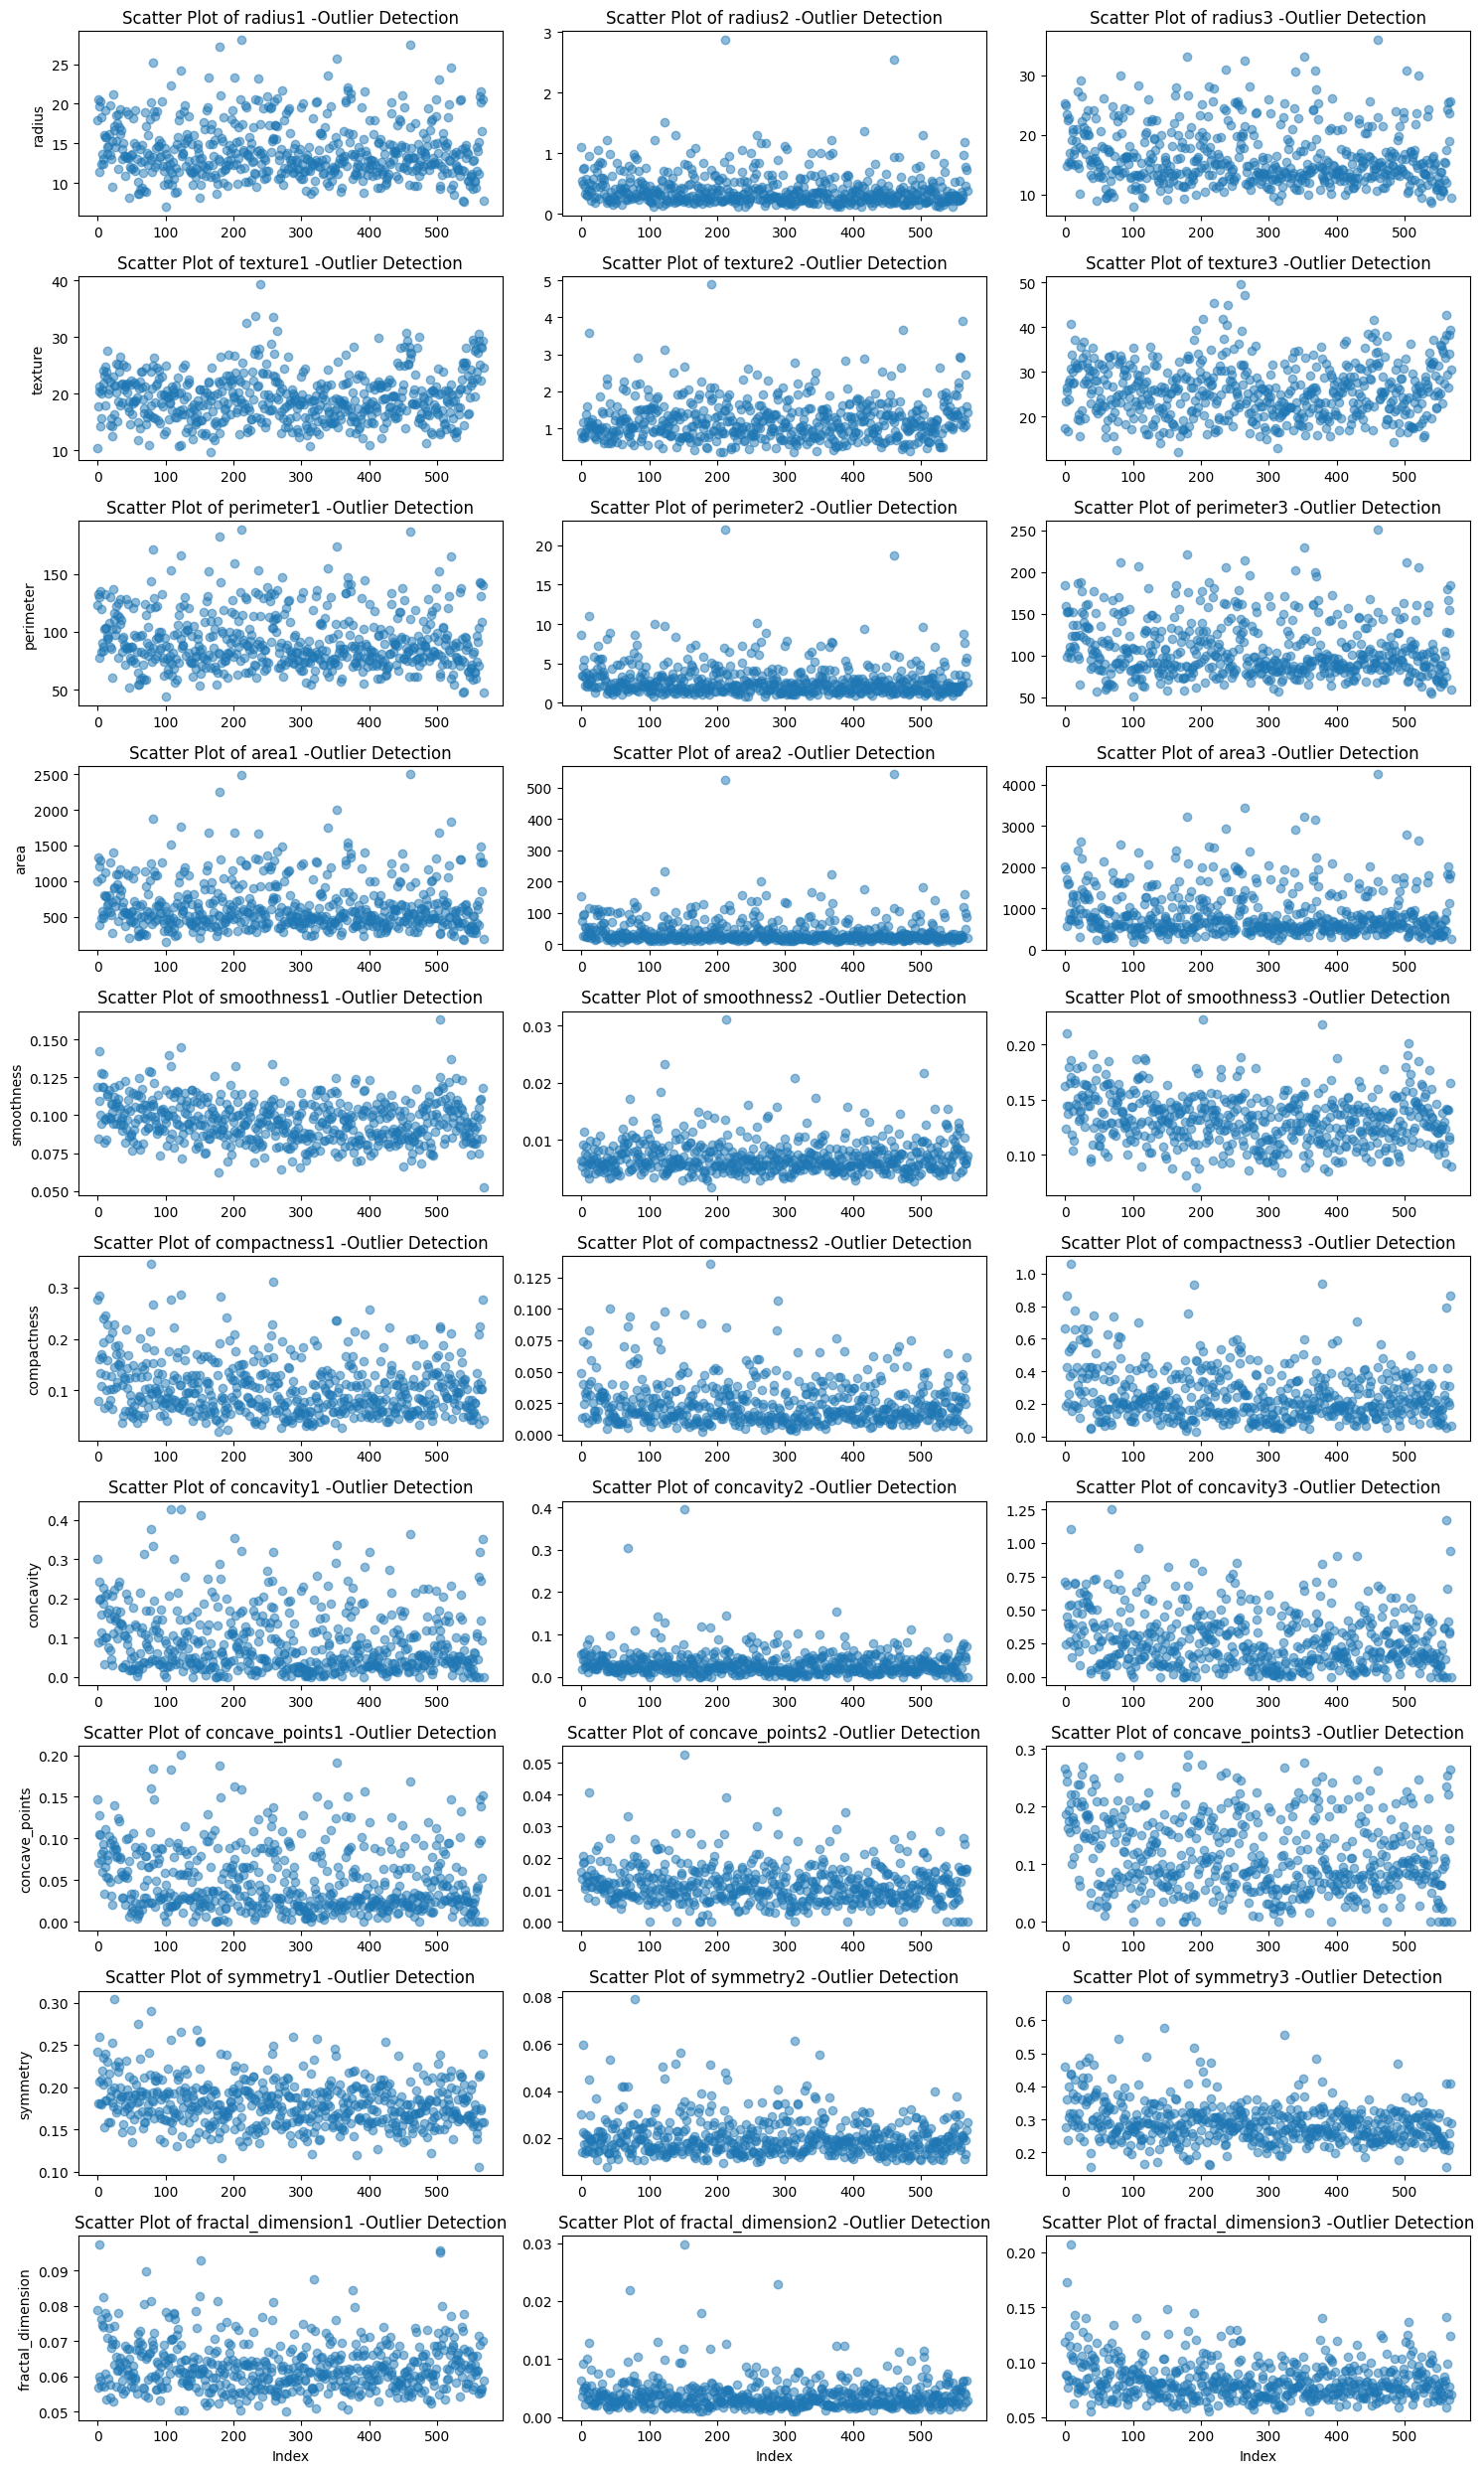

In [165]:
# Regression= scatter plot
feature_list=['radius','texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']
fig, axes= plt.subplots(10,3, figsize=(15,25))
#axes=axes.flatten()

for i, feature in enumerate(feature_list):
    for j in range(1,4):
        column=f'{feature}{j}'
        axes[i, j-1].scatter(range(len(X)), X[column], alpha=0.5)

        if i==9:
            axes[i, j-1].set_xlabel('Index')
        if j==1:
            axes[i, j-1].set_ylabel(f'{feature}')

        axes[i, j-1].set_title(f'Scatter Plot of {column} -Outlier Detection')

plt.tight_layout()
plt.show() #out of loop to see all graphs together

Diagnosis
B            62.741652
M            37.258348
Name: proportion, dtype: float64


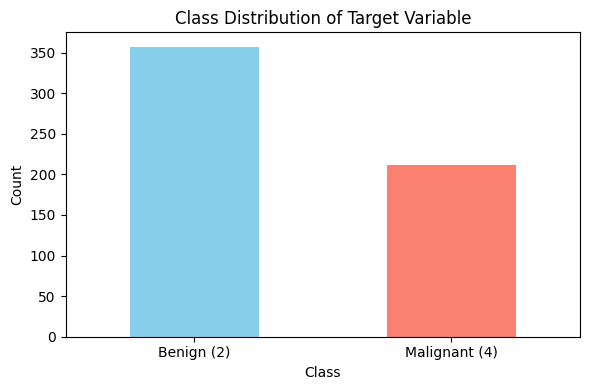

In [166]:
# Class Distribution
print(y.value_counts(normalize=True)*100) # Class distribution percentages: B- 62.742%, M 37.258%
plt.figure(figsize=(6,4))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Benign (2)', 'Malignant (4)'], rotation=0)
plt.tight_layout()
plt.show()

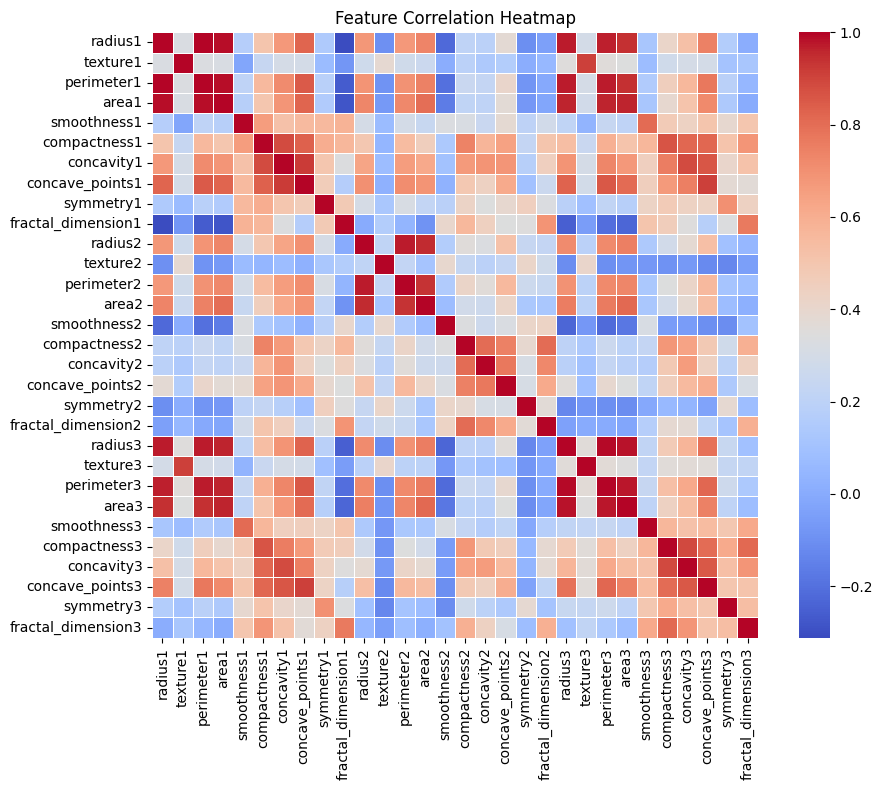

In [167]:
# Correlation matrix to see relationships between features
plt.figure(figsize=(10,8))
correlation_matrix = X.corr() #correlation matrix
#print(correlation_matrix)
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', square=True, linecolor='white', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

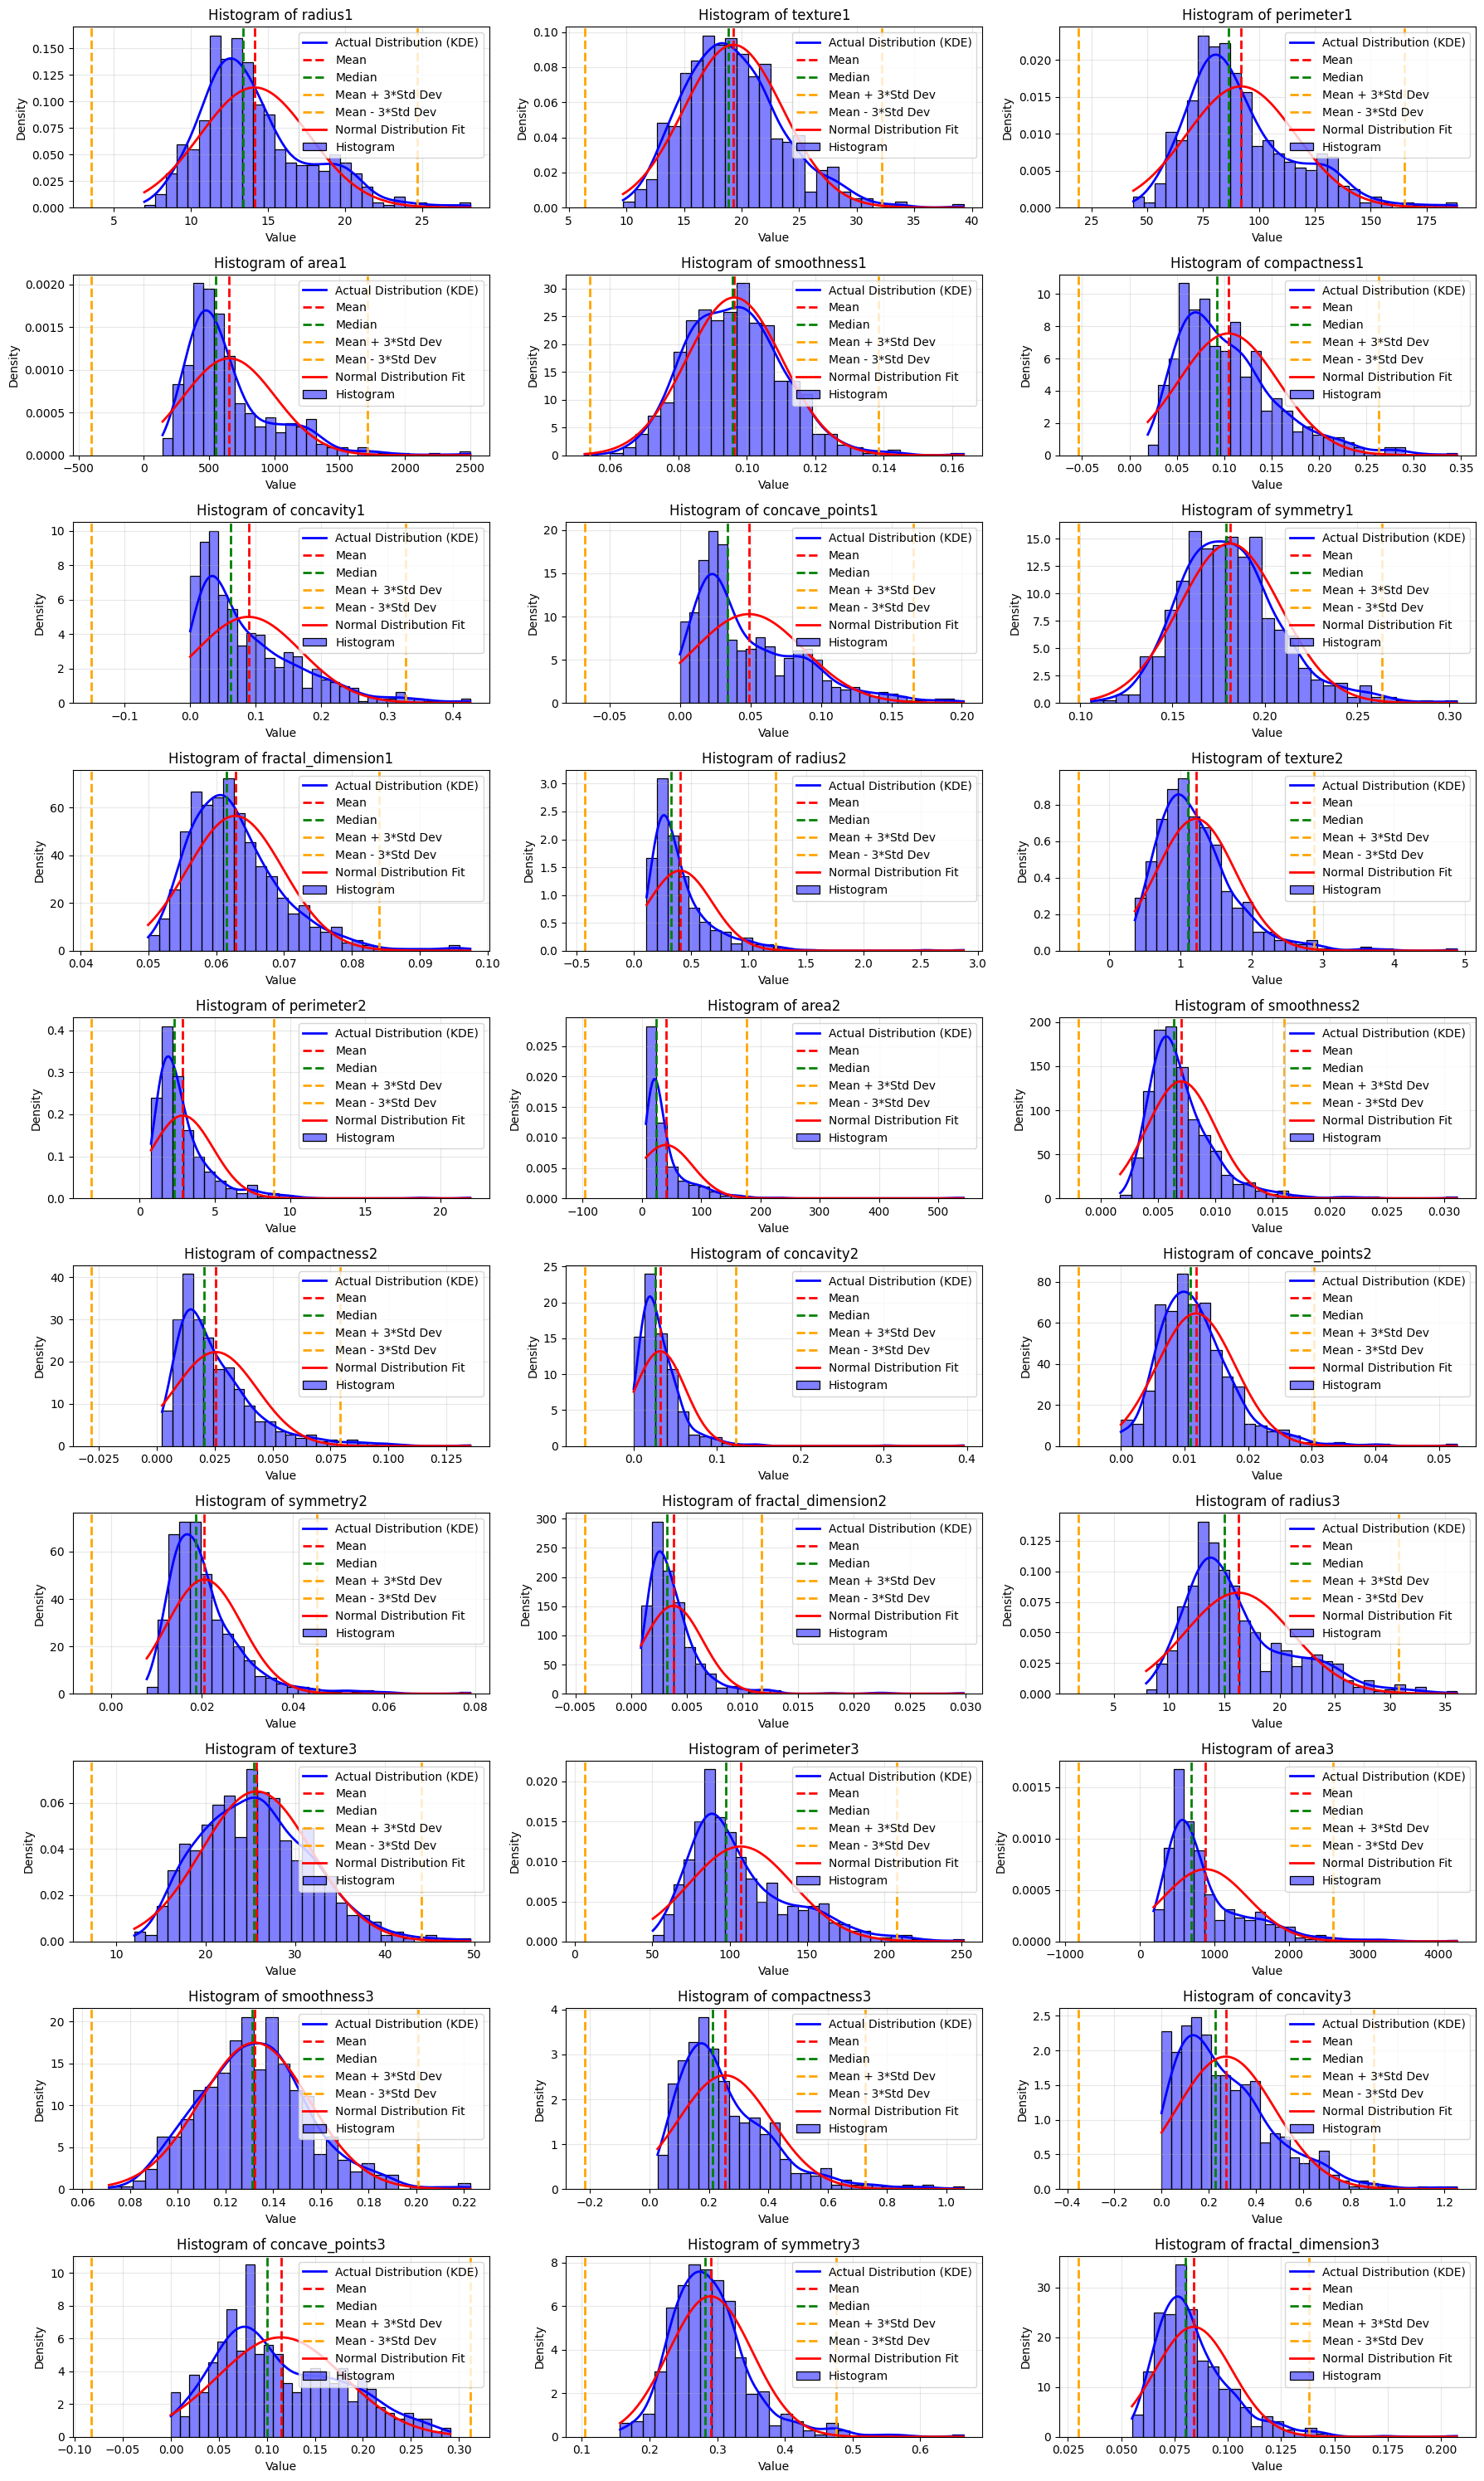

In [168]:
#Histogram for all features to find outliers
fig, axes= plt.subplots(10,3, figsize=(18,30))
axes= axes. flatten()

for i, column in enumerate(X.columns):
    ax=axes[i]
    mean = X[column].mean()
    std = X[column].std()
    median= X[column].median()
    x= np.linspace(X[column].min(), X[column].max(), 100)

    sns.histplot(X[column], bins=30, kde=True, color='blue', edgecolor='black', ax=ax, stat= 'density', label='Histogram', line_kws={'color': 'purple', 'lw': 2, 'label': 'Actual Distribution (KDE)'})
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Median')
    ax.axvline(mean + 3*std, color='orange', linestyle='dashed', linewidth=2, label='Mean + 3*Std Dev')
    ax.axvline(mean - 3*std, color='orange', linestyle='dashed', linewidth=2, label='Mean - 3*Std Dev')

    normal_curve= stats.norm.pdf(x, mean, std)
    ax.plot(x, normal_curve, color='red', linewidth=2, label='Normal Distribution Fit')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [169]:
print(y.tail())

    Diagnosis
564         M
565         M
566         M
567         M
568         B


Encoding

In [170]:
# ENCODING
y_encoded= y.replace({'B':0,'M':1}) # Encode target variable: 2 -> 0 (benign), 4 -> 1 (malignant)
#y_singleCol= y_encoded.values.ravel()) # Check encoded target values
print("Unique values",y_encoded.nunique()) # Check unique values in encoded target: [0, 1]
print("Value count",y_encoded.value_counts()) # Check encoded target distribution: 0- 357, 1- 212
print("Percentages",y_encoded.value_counts(normalize=True)*100) # Percentages: 0- 62.741652%, 1- 37.258348%

Unique values Diagnosis    2
dtype: int64
Value count Diagnosis
0            357
1            212
Name: count, dtype: int64
Percentages Diagnosis
0            62.741652
1            37.258348
Name: proportion, dtype: float64


/tmp/ipython-input-1576749366.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_encoded= y.replace({'B':0,'M':1}) # Encode target variable: 2 -> 0 (benign), 4 -> 1 (malignant)


Train- Test Split

References:
https://www.datacamp.com/tutorial/decision-tree-classification-python
https://medium.com/@enozeren/building-a-decision-tree-from-scratch-324b9a5ed836 from pg194

In [171]:
# https://coderivers.org/blog/train-test-split-python/
np.random.seed(42)
test_size=0.2
n_samples=len(X)
n_test=int(test_size * n_samples)

#shuffle indices not the data
shuffle_ind = np.random.permutation(n_samples)

X_train = X.iloc[shuffle_ind[:-n_test]] #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
X_test = X.iloc[shuffle_ind[-n_test:]]
y_train = y_encoded.iloc[shuffle_ind[:-n_test]]
y_test = y_encoded.iloc[shuffle_ind[-n_test:]]

print(X_train.shape, X_test.shape) # (456, 30) (113, 30)
print(y_train.shape, y_test.shape) # (456,1) (113,1)
#print(X_train.head())

(456, 30) (113, 30)
(456, 1) (113, 1)


In [172]:
#CODE CHECK
print("X set", X_train.shape, X_test.shape)
print("Y set", y_train.shape, y_test.shape)
print("Training distribution",y_train.value_counts(), y_train.value_counts(normalize=True)*100)
print("Testing distribution",y_test.value_counts(), y_test.value_counts(normalize=True)*100)


X set (456, 30) (113, 30)
Y set (456, 1) (113, 1)
Training distribution Diagnosis
0            290
1            166
Name: count, dtype: int64 Diagnosis
0            63.596491
1            36.403509
Name: proportion, dtype: float64
Testing distribution Diagnosis
0            67
1            46
Name: count, dtype: int64 Diagnosis
0            59.292035
1            40.707965
Name: proportion, dtype: float64


In [173]:
# SCALING
train_mean= X_train.mean()
train_std= X_train.std()
print("Train mean", train_mean)
print("Train std", train_std)

X_train_scaled= (X_train - train_mean)/ train_std
X_test_scaled= (X_test - train_mean)/ train_std # standarised using train mean and std


Train mean radius1                14.062868
texture1               19.317039
perimeter1             91.559518
area1                 648.043421
smoothness1             0.096312
compactness1            0.104675
concavity1              0.088962
concave_points1         0.048649
symmetry1               0.181258
fractal_dimension1      0.062965
radius2                 0.399411
texture2                1.232766
perimeter2              2.830990
area2                  39.012094
smoothness2             0.007019
compactness2            0.025527
concavity2              0.032239
concave_points2         0.011656
symmetry2               0.020605
fractal_dimension2      0.003796
radius3                16.217689
texture3               25.749759
perimeter3            107.015395
area3                 874.523904
smoothness3             0.132285
compactness3            0.254867
concavity3              0.273174
concave_points3         0.113742
symmetry3               0.291109
fractal_dimension3      0.084057

In [174]:
# Convert scaled pandas DataFrames to NumPy arrays
X_train_np = X_train_scaled.values
X_test_np  = X_test_scaled.values

y_train_np = y_train.values.ravel()
y_test_np  = y_test.values.ravel()

In [175]:
print("Shape", X_train_scaled.shape, X_test_scaled.shape)

Shape (456, 30) (113, 30)


Logistic Regression

In [176]:
class LogisticRegression:
    """
    Logistic regression with gradient descent.

    Model: P(y=1|x) = σ(w^T x + b) where σ is the sigmoid function
    Loss: Cross-entropy with L2 regularization

    We use batch gradient descent to optimize. Following Chapter 4 of Hastie et al.
    (Elements of Statistical Learning, 2009) for the theory, with gradient formulas
    from Bishop (2006).

    Parameters:
        learning_rate: Step size α for gradient updates
        num_iterations: How many passes through the data
        regularization: L2 penalty λ to prevent overfitting
    """

    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization=0.01):

        """Initialize logistic regression parameters"""

        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization = regularization
        self.weights = None
        self.bias = None
        self.losses = []  # Track convergence

    def _sigmoid(self, z):
        """
        Sigmoid function: σ(z) = 1 / (1 + e^(-z))
        """
        #Squashes any input to a probability between 0 and 1

        # Clip to prevent overflow in exp()
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Train using gradient descent.

        At each iteration:
            1. Compute predictions: ŷ = σ(Xw + b)
            2. Calculate gradients: ∂L/∂w = (1/n)X^T(ŷ - y) + λw
            3. Update: w ← w - α(∂L/∂w)

        Gradients derived from cross-entropy loss
        """

        n_samples, n_features = X.shape

        # Initialize parameters to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent optimization
        for iteration in range(self.num_iterations):
            # Forward pass: compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # Compute gradients (using calculus chain rule)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Add L2 regularization gradient
            dw += (self.regularization / n_samples) * self.weights

            # Update parameters (gradient descent step)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Track loss for convergence monitoring
            if iteration % 100 == 0:
                loss = self._compute_loss(X, y)
                self.losses.append(loss)

    def _compute_loss(self, X, y):
        """
        Compute cross-entropy loss with L2 regularization.

        Loss Function Components:
            1. Cross-Entropy: Measures prediction error
               -1/n Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]

            2. L2 Regularization: Prevents overfitting
               λ/(2n) ||w||²

        Derivation:
            From maximum likelihood estimation (MLE) of Bernoulli distribution
            Negative log-likelihood = cross-entropy

        Args:
            X: Features
            y: True labels

        Returns:
            Total loss value
        """
        n_samples = X.shape[0]
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)

        # Cross-entropy loss (avoid log(0) with epsilon)
        epsilon = 1e-9
        cross_entropy = -np.mean(
            y * np.log(y_predicted + epsilon) +
            (1 - y) * np.log(1 - y_predicted + epsilon)
        )

        # L2 regularization penalty
        l2_penalty = (self.regularization / (2 * n_samples)) * np.sum(self.weights ** 2)

        return cross_entropy + l2_penalty

    def predict_proba(self, X):
        """Return probability of positive class using sigmoid(w·x + b)."""

        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        """Predict class labels: 1 if P(y=1) ≥ threshold, else 0."""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)



SVM

In [177]:
"""
This includes:
1. Proper gradient computation (fixed the bug)
2. Detailed debugging output
3. Learning rate scheduling (helps convergence)
4. Verification that it's learning both classes

There's no "kernel" vs "regular" SVM distinction we need to make.
We're implementing a LINEAR SVM (the simplest kind).
Kernel SVM is much more complex and not required.
"""

import numpy as np

class SupportVectorMachine:
    """
    Linear SVM with hinge loss optimization using Pegasos algorithm.

    This is a LINEAR SVM (no kernel). Kernel SVM would require:
    - Kernel functions (RBF, polynomial, etc.)
    - Dual formulation
    - Much more complex optimization

    We're implementing the PRIMAL formulation with sub-gradient descent,
    which is simpler and works well for linearly separable data.

    Based on:
    - Cortes & Vapnik (1995) - Original SVM paper
    - Shalev-Shwartz et al. (2011) - Pegasos algorithm
    """

    def __init__(self, learning_rate=0.001, lambda_param=0.01, num_iterations=1000, verbose=False):
        """
        Initialize SVM hyperparameters.

        Args:
            learning_rate: Initial step size for gradient descent
            lambda_param: Regularization parameter (C = 1/lambda in some formulations)
            num_iterations: Number of passes through the data
            verbose: If True, print debugging info during training
        """
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.loss_history = []  # Track loss over time

    def fit(self, X, y):
        """
        Train SVM using Pegasos (Primal Estimated sub-GrAdient SOlver for SVM).

        The algorithm:
        1. Convert labels to {-1, +1}
        2. Initialize weights to zero
        3. For each iteration:
           - For each sample:
             - Check if correctly classified with margin
             - Update weights accordingly

        Key insight: We want to find w, b such that:
            y_i(w·x_i + b) ≥ 1 for all i (correct with margin)
        """
        n_samples, n_features = X.shape

        # Convert labels from {0, 1} to {-1, +1}
        # This is standard for SVM: allows using y(w·x+b) for margin
        y_svm = np.where(y <= 0, -1, 1)

        # Verify label conversion
        if self.verbose:
            print(f"\nLabel conversion:")
            print(f"  Original unique: {np.unique(y)}")
            print(f"  Converted unique: {np.unique(y_svm)}")
            print(f"  Distribution: {np.bincount(y_svm + 1)}")  # Shift to [0,2] for bincount

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Track how many times we update for each class
        updates_class_neg = 0
        updates_class_pos = 0

        # Sub-gradient descent
        for iteration in range(self.num_iterations):
            # Optional: learning rate decay (helps convergence)
            # current_lr = self.learning_rate / (1 + iteration / 100)
            current_lr = self.learning_rate  # Or use fixed learning rate

            total_loss = 0
            num_violations = 0

            for idx in range(n_samples):
                x_i = X[idx]
                y_i = y_svm[idx]

                # Compute margin: y_i(w·x_i + b)
                margin = y_i * (np.dot(self.weights, x_i) + self.bias)

                # Hinge loss: max(0, 1 - margin)
                loss = max(0, 1 - margin)
                total_loss += loss

                if margin >= 1:
                    # Correctly classified with margin
                    # Only apply regularization: w ← w - α(λw)
                    self.weights -= current_lr * (self.lambda_param * self.weights)
                else:
                    # Violated margin (misclassified or too close)
                    # Apply full gradient: w ← w - α(λw - y_i*x_i)
                    # CRITICAL: Must be y_i * x_i (vector), NOT np.dot(x_i, y_i) (scalar)
                    self.weights -= current_lr * (
                        self.lambda_param * self.weights - y_i * x_i
                    )
                    self.bias -= current_lr * (-y_i)  # Gradient of bias

                    num_violations += 1
                    if y_i == -1:
                        updates_class_neg += 1
                    else:
                        updates_class_pos += 1

            # Track average loss
            avg_loss = total_loss / n_samples
            self.loss_history.append(avg_loss)

            # Print progress
            if self.verbose and (iteration % 200 == 0 or iteration == self.num_iterations - 1):
                print(f"Iteration {iteration:4d}: Loss = {avg_loss:.4f}, "
                      f"Violations = {num_violations}/{n_samples}")

        if self.verbose:
            print(f"\nTraining complete!")
            print(f"Final weights range: [{self.weights.min():.4f}, {self.weights.max():.4f}]")
            print(f"Final bias: {self.bias:.4f}")
            print(f"Updates for class -1: {updates_class_neg}")
            print(f"Updates for class +1: {updates_class_pos}")

            # Check if both classes were learned
            if updates_class_neg == 0 or updates_class_pos == 0:
                print("⚠ WARNING: No updates for one class! Model may be degenerate.")

    def _decision_function(self, X):
        """
        Compute decision values: w·x + b

        Interpretation:
        - Positive: Classified as +1 (class 1)
        - Negative: Classified as -1 (class 0)
        - Magnitude: Confidence (distance from decision boundary)
        """
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        """
        Predict class labels.

        Decision rule: sign(w·x + b)
        - If w·x + b ≥ 0 → predict 1
        - If w·x + b < 0  → predict 0
        """
        decision = self._decision_function(X)
        return np.where(decision >= 0, 1, 0)

    def predict_proba(self, X):
        """
        Estimate probabilities using sigmoid of decision function.

        Note: SVMs don't naturally produce probabilities!
        This is a rough approximation. For better calibration, use Platt scaling.
        """
        decision = self._decision_function(X)
        # Clip to prevent overflow
        decision_clipped = np.clip(decision, -500, 500)
        return 1 / (1 + np.exp(-decision_clipped))

    def get_decision_stats(self, X, y):
        """
        Debugging method: Check decision function values and predictions.
        """
        decisions = self._decision_function(X)
        predictions = self.predict(X)

        print("\n" + "="*60)
        print("DECISION FUNCTION STATISTICS")
        print("="*60)
        print(f"Decision values range: [{decisions.min():.4f}, {decisions.max():.4f}]")
        print(f"Decision values mean: {decisions.mean():.4f}")
        print(f"Decision values std: {decisions.std():.4f}")

        print(f"\nPredictions unique: {np.unique(predictions)}")
        print(f"Predictions distribution: {np.bincount(predictions)}")

        print(f"\nTrue labels unique: {np.unique(y)}")
        print(f"True labels distribution: {np.bincount(y)}")

        # Check decision values by class
        for cls in [0, 1]:
            mask = y == cls
            if np.sum(mask) > 0:
                cls_decisions = decisions[mask]
                print(f"\nClass {cls} decision values:")
                print(f"  Range: [{cls_decisions.min():.4f}, {cls_decisions.max():.4f}]")
                print(f"  Mean: {cls_decisions.mean():.4f}")

        # Check if model is just predicting one class
        if len(np.unique(predictions)) == 1:
            print("Model is predicting only ONE class!")
            print("   Possible causes:")
            print("   1. Features not scaled properly")
            print("   2. Learning rate too high/low")
            print("   3. Lambda too high")
            print("   4. Not enough iterations")
        else:
            print("\nModel is predicting both classes")

        print("="*60)


KNN

In [178]:
class KNearestNeighbors:
    """
    KNN classifier.

    Instead of training a model, it just stores the training data and makes predictions by finding the k closest examples.
    Classification is by majority vote.

    We support Euclidean and Manhattan distance metrics.

    Parameters:
        k: Number of neighbors to consider
        distance_metric: 'euclidean' or 'manhattan'
    """

    def __init__(self, k=5, distance_metric='euclidean'):
        """Set k and distance metric."""
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Just store the training data. KNN doesn't actually "train" anything.
        All the work happens during prediction.
        """
        self.X_train = X
        self.y_train = y

    def _compute_distance(self, x1, x2):
        """
        Calculate distance between two points.

        Euclidean: d(x,y) = √(Σᵢ(xᵢ - yᵢ)²) - straight line distance
        Manhattan: d(x,y) = Σᵢ|xᵢ - yᵢ| - grid/taxicab distance
        """
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError("Distance metric must be 'euclidean' or 'manhattan'")

    def _get_neighbors(self, x):
        """
        Find KNN by computing all distances and taking the k smallest.

        This is a naive O(n) search.
        """
        # Calculate distances to all training samples
        distances = [self._compute_distance(x, x_train)
                    for x_train in self.X_train]

        # Get indices of k smallest distances
        k_indices = np.argsort(distances)[:self.k]

        return k_indices

    def _majority_vote(self, neighbor_labels):
        """
        Find the most common class among the k neighbors. Simple majority wins.

        We considered distance-weighted voting but it didn't improve results
        on our dataset, so stuck with the simpler approach.
        """
        unique_labels, counts = np.unique(neighbor_labels, return_counts=True)
        max_count_idx = np.argmax(counts)
        return unique_labels[max_count_idx]

    def predict(self, X):
        """Predict by finding k nearest neighbors for each sample and taking majority vote."""
        predictions = []

        for x in X:
            # Find k nearest neighbors
            k_indices = self._get_neighbors(x)

            # Get labels of neighbors
            k_nearest_labels = self.y_train[k_indices]

            # Majority vote
            prediction = self._majority_vote(k_nearest_labels)
            predictions.append(prediction)

        return np.array(predictions)

    def predict_proba(self, X):
        """
        Estimate P(y=1) as the proportion of positive neighbors: (# positive) / k
        Simple frequency-based probability.
        """
        probabilities = []

        for x in X:
            k_indices = self._get_neighbors(x)
            k_nearest_labels = self.y_train[k_indices]

            # Probability = proportion of positive class
            prob_positive = np.sum(k_nearest_labels == 1) / self.k
            probabilities.append(prob_positive)

        return np.array(probabilities)


Decision Tree

Reference:
https://github.com/shivamms/books/blob/master/nlp/Data%20Science%20from%20Scratch-%20First%20Principles%20with%20Python.pdf pg204

In [179]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None): #all set to none
        self.feature = feature          # Feature index for splitting
        self.threshold = threshold      # Threshold value for splitting
        self.left = left                # Left child node
        self.right = right              # Right child node
        self.value = value              # Class label for leaf nodes

In [180]:
class DecisionTree:

    """
    Decision tree classifier using information gain for splits.

    We're implementing CART (Breiman et al., 1984) with entropy-based splitting
    following Quinlan's approach (1986). The tree grows recursively, choosing the
    best split at each node by maximizing information gain.

    Parameters:
        max_depth: How deep the tree can grow (prevents overfitting)
        min_samples_split: Min samples needed to split a node
    """

    def __init__(self, max_depth=10, min_samples_split=2): #default values set to 10 questions
        """Initialize the tree with stopping criteria to prevent overfitting."""
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        """Build the tree by recursively finding the best splits."""
        self.root = self._grow_tree(X, y) #tree starts growing from root

    def _grow_tree(self, X, y, depth=0):
        """
        Recursively grow the tree. Stops when we hit max depth, run out of samples,
        or all samples belong to the same class.
        """
        A_samples, A_features = X.shape
        unique_classes = np.unique(y)

        # Stopping criteria
        if (len(unique_classes) == 1 or
            A_samples < self.min_samples_split or
            depth >= self.max_depth): #max set at 10
            leaf_value = self._mode_label(y)
            return Node(value=leaf_value)

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y, A_features)

        # If no valid split is found, create a leaf node
        if best_feature is None:
            leaf_value = self._mode_label(y)
            return Node(value=leaf_value)

        # Split the dataset
        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def _best_split(self, X, y, A_features): #best feature and threshold to split on
        """
        Find the best feature and threshold to split on.

        We just try all features and all possible thresholds (greedy approach
        from Quinlan 1986) and pick whichever gives the highest information gain.
        """
        best_gain = -1
        split_idx, split_threshold = None, None

        for feature_index in range(A_features):
            X_column=X[:, feature_index] #store feature column
            thresholds = np.unique(X_column) #use stored column to get unique thresholds
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_index
                    split_threshold = threshold

        return split_idx, split_threshold

    #Information gain entropy
    def _information_gain(self, y, X_column, threshold):
        """
        Calculate information gain from a split.

        Formula: IG = H(parent) - weighted_average(H(children))

        This measures how much splitting reduces uncertainty. Higher gain = better split.
        Based on Shannon entropy (1948), applied to decision trees by Quinlan (1986).
        """
        parent_entropy = self._entropy(y)
        # Generate split
        left_indices = X_column < threshold
        right_indices = X_column >= threshold
        if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
            return 0

        #weighted avg of child entropies
        n = len(y)
        n_left, n_right = len(y[left_indices]), len(y[right_indices])
        e_left, e_right = self._entropy(y[left_indices]), self._entropy(y[right_indices])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right
        #info gain is parent entropy - child entropy
        info_gain= parent_entropy - child_entropy
        return info_gain

    def _entropy(self, y):
        """
        Calculate entropy: H(S) = -Σ(p_i * log2(p_i))
        ref: https://medium.com/@dswithgk/the-mathematics-behind-decision-trees-a-step-by-step-guide-e1aef9e30a36

        Measures impurity/uncertainty in the data. Pure node (all same class) = 0 entropy.
        From Shannon (1948).
        """
        class_labels, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-9)) #add small value to avoid log(0)
        return entropy

    def _mode_label(self, y):
        """Return the most frequent class label (for leaf nodes)."""
        values, counts = np.unique(y, return_counts=True)
        max_count_value= np.argmax(counts) #index of max count
        most_common = values[max_count_value]
        return most_common

    def predict(self, X):
        """Predict class labels by traversing the tree for each sample."""
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        """Recursively follow the decision rules until we hit a leaf."""
        if node.value is not None: #yes=leaf, no= decision node
            return node.value

        if x[node.feature] < node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

Evaluation Matrix Function

In [181]:
def calculate_metrics(y_true, y_pred, model_name=None, verbose=True):
    """
    Calculate standard classification metrics from scratch.

    Metrics:
        - Accuracy: (TP + TN) / Total
        - Precision: TP / (TP + FP)
        - Recall: TP / (TP + FN)
        - F1: 2 * (Precision * Recall) / (Precision + Recall)

    We compute these manually to show understanding of the evaluation process.

    Args:
        y_true: True labels
        y_pred: Predicted labels
        model_name: Optional name for printing
        verbose: If True, print the metrics (default: True)

    Returns:
        Dictionary with all metrics and confusion matrix values
    """
    # Calculate confusion matrix components
    true_positive = int(np.sum((y_true == 1) & (y_pred == 1)))
    true_negative = int(np.sum((y_true == 0) & (y_pred == 0)))
    false_positive = int(np.sum((y_true == 0) & (y_pred == 1)))
    false_negative = int(np.sum((y_true == 1) & (y_pred == 0)))

    # Calculate metrics
    total = len(y_true)
    accuracy = (true_positive + true_negative) / total
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Print results only if verbose=True
    if verbose:
        print(f"\nEVALUATION RESULTS: {model_name if model_name else 'Model'}")
        print(f"\nPerformance Metrics:")
        print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:6.2f}%)")
        print(f"  Precision: {precision:.4f} ({precision*100:6.2f}%)")
        print(f"  Recall:    {recall:.4f} ({recall*100:6.2f}%)")
        print(f"  F1-Score:  {f1_score:.4f} ({f1_score*100:6.2f}%)")

        print(f"\nConfusion Matrix:")
        print(f"                Predicted")
        print(f"                0       1")
        print(f"  Actual  0    {true_negative:3d}    {false_positive:3d}   (TN)  (FP)")
        print(f"          1    {false_negative:3d}    {true_positive:3d}   (FN)  (TP)")

    return {
        "Model": model_name if model_name else "Model",
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "tn": true_negative,
        "fp": false_positive,
        "fn": false_negative,
        "tp": true_positive
    }

print("Metrics function defined")

Metrics function defined


In [182]:
# Quick debug - run this first to see what keys exist
print("Checking calculate_metrics return values...")
test_metrics = calculate_metrics(y_test_np[:10], y_test_np[:10], verbose=False)
print(f"Keys returned: {list(test_metrics.keys())}")

Checking calculate_metrics return values...
Keys returned: ['Model', 'accuracy', 'precision', 'recall', 'f1_score', 'tn', 'fp', 'fn', 'tp']


Hyperparameter Tuning- DT

In [183]:
def grid_search_dt(X_train, y_train, X_test, y_test):
    """
    Try different combinations of hyperparameters to find the best one for Decision Tree.
    It just brute force through all combinations.
    """
    best_acc = 0
    best_param = {}
    results = []

    max_depth = [2, 4, 6, 8, 10, 15, 20, 25, 30]  # different tree depths to try
    min_samples_split = [2, 5, 10, 15, 20]  # minimum samples needed to split

    total_combo = len(max_depth) * len(min_samples_split)
    print(f"\nTesting {total_combo} parameter combinations for Decision Tree...")

    combo_count = 0
    for depth in max_depth:
        for min_samples in min_samples_split:
            combo_count += 1
            print(f"[{combo_count}/{total_combo}] Testing: max_depth={depth}, min_samples_split={min_samples}", end='')

            dtree = DecisionTree(max_depth=depth, min_samples_split=min_samples)
            dtree.fit(X_train, y_train)
            y_pred = dtree.predict(X_test)
            metrics = calculate_metrics(y_test, y_pred, verbose=False )

            results.append({
                'max_depth': depth,
                'min_samples_split': min_samples,
                'accuracy': metrics['accuracy'],
                'precision': metrics['precision'],
                'recall': metrics['recall'],
                'f1_score': metrics['f1_score']
            })

            if metrics['accuracy'] > best_acc:
                best_acc = metrics['accuracy']
                best_param = {'max_depth': depth, 'min_samples_split': min_samples}
                print(f" -> New best! Accuracy: {best_acc*100:.2f}%")
            else:
                print(f" -> Accuracy: {metrics['accuracy']*100:.2f}%")

    print(f"\nBest parameters found: {best_param}")
    print(f"Best accuracy: {best_acc*100:.2f}%")

    return best_param, results

Hyperparameter Tuning-KNN

In [184]:
def grid_search_knn(X_train, y_train, X_test, y_test):
    """
    Grid search for KNN to find optimal k and distance metric.
    """
    best_acc = 0
    best_param = {}
    results = []

    k_values = [1, 3, 5, 7, 9, 11, 15, 19]
    distance_metrics = ['euclidean', 'manhattan']

    total_combo = len(k_values) * len(distance_metrics)
    print(f"\nTesting {total_combo} parameter combinations for KNN...")

    combo_count = 0
    for k in k_values:
        for metric in distance_metrics:
            combo_count += 1
            print(f"[{combo_count}/{total_combo}] Testing: k={k}, metric={metric}", end='')

            knn = KNearestNeighbors(k=k, distance_metric=metric)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            metrics = calculate_metrics(y_test, y_pred, verbose=False)

            results.append({
                'k': k,
                'distance_metric': metric,
                'accuracy': metrics['accuracy'],
                'precision': metrics['precision'],
                'recall': metrics['recall'],
                'f1_score': metrics['f1_score']
            })

            if metrics['accuracy'] > best_acc:
                best_acc = metrics['accuracy']
                best_param = {'k': k, 'distance_metric': metric}
                print(f" -> New best! Accuracy: {best_acc*100:.2f}%")
            else:
                print(f" -> Accuracy: {metrics['accuracy']*100:.2f}%")

    print(f"\nBest parameters found: {best_param}")
    print(f"Best accuracy: {best_acc*100:.2f}%")

    return best_param, results


Hyperparameter Tuning- LR

In [185]:
def grid_search_lr(X_train, y_train, X_test, y_test):
    """
    Grid search for Logistic Regression hyperparameters.
    """
    best_acc = 0
    best_param = {}
    results = []

    learning_rates = [0.001, 0.01, 0.05, 0.1]
    regularizations = [0.001, 0.01, 0.1, 1.0]
    num_iterations = [500, 1000, 2000]

    total_combo = len(learning_rates) * len(regularizations) * len(num_iterations)
    print(f"\nTesting {total_combo} parameter combinations for Logistic Regression...")

    combo_count = 0
    for lr in learning_rates:
        for reg in regularizations:
            for iters in num_iterations:
                combo_count += 1
                print(f"[{combo_count}/{total_combo}] lr={lr}, reg={reg}, iters={iters}", end='')

                model = LogisticRegression(learning_rate=lr, num_iterations=iters, regularization=reg)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                metrics = calculate_metrics(y_test, y_pred, verbose=False)

                results.append({
                    'learning_rate': lr,
                    'regularization': reg,
                    'num_iterations': iters,
                    'accuracy': metrics['accuracy'],
                    'precision': metrics['precision'],
                    'recall': metrics['recall'],
                    'f1_score': metrics['f1_score']
                })

                if metrics['accuracy'] > best_acc:
                    best_acc = metrics['accuracy']
                    best_param = {'learning_rate': lr, 'regularization': reg, 'num_iterations': iters}
                    print(f" -> New best! Accuracy: {best_acc*100:.2f}%")
                else:
                    print(f" -> Accuracy: {metrics['accuracy']*100:.2f}%")

    print(f"\nBest parameters found: {best_param}")
    print(f"Best accuracy: {best_acc*100:.2f}%")

    return best_param, results

Hyperparameter Tuning- SVM

In [186]:
def grid_search_svm(X_train, y_train, X_test, y_test):
    """
    Grid search for SVM hyperparameters.
    """
    best_acc = 0
    best_param = {}
    results = []

    learning_rates = [0.0001, 0.001, 0.01]
    lambda_params = [0.001, 0.01, 0.1, 1.0]
    num_iterations = [500, 1000, 2000]

    total_combo = len(learning_rates) * len(lambda_params) * len(num_iterations)
    print(f"\nTesting {total_combo} parameter combinations for SVM...")

    combo_count = 0
    for lr in learning_rates:
        for lam in lambda_params:
            for iters in num_iterations:
                combo_count += 1
                print(f"[{combo_count}/{total_combo}] lr={lr}, lambda={lam}, iters={iters}", end='')

                model = SupportVectorMachine(learning_rate=lr, lambda_param=lam, num_iterations=iters)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                metrics = calculate_metrics(y_test, y_pred, verbose=False)

                results.append({
                    'learning_rate': lr,
                    'lambda_param': lam,
                    'num_iterations': iters,
                    'accuracy': metrics['accuracy'],
                    'precision': metrics['precision'],
                    'recall': metrics['recall'],
                    'f1_score': metrics['f1_score']
                })

                if metrics['accuracy'] > best_acc:
                    best_acc = metrics['accuracy']
                    best_param = {'learning_rate': lr, 'lambda_param': lam, 'num_iterations': iters}
                    print(f" -> New best! Accuracy: {best_acc*100:.2f}%")
                else:
                    print(f" -> Accuracy: {metrics['accuracy']*100:.2f}%")

    print(f"\nBest parameters found: {best_param}")
    print(f"Best accuracy: {best_acc*100:.2f}%")

    return best_param, results

Model Tuning vs Hyperparam

In [187]:
# 1. Decision Tree Grid Search
print("\n1. DECISION TREE")
best_dt_params, dt_results = grid_search_dt(X_train_np, y_train_np, X_test_np, y_test_np)

# 2. KNN Grid Search
print("\n2. K-NEAREST NEIGHBORS")
best_knn_params, knn_results = grid_search_knn(X_train_np, y_train_np, X_test_np, y_test_np)

# 3. Logistic Regression Grid Search
print("\n 3. LOGISTIC REGRESSION")
best_lr_params, lr_results = grid_search_lr(X_train_np, y_train_np, X_test_np, y_test_np)

# 4. SVM Grid Search

print("\n4. SUPPORT VECTOR MACHINE")
best_svm_params, svm_results = grid_search_svm(X_train_np, y_train_np, X_test_np, y_test_np)

print("\nHYPERPARAMETER TUNING COMPLETE!")

# Summary of best parameters
print("\nBEST PARAMETERS FOUND:")
print(f"Decision Tree:        {best_dt_params}")
print(f"KNN:                 {best_knn_params}")
print(f"Logistic Regression:  {best_lr_params}")
print(f"SVM:                  {best_svm_params}")


1. DECISION TREE

Testing 45 parameter combinations for Decision Tree...
[1/45] Testing: max_depth=2, min_samples_split=2 -> New best! Accuracy: 85.84%
[2/45] Testing: max_depth=2, min_samples_split=5 -> Accuracy: 85.84%
[3/45] Testing: max_depth=2, min_samples_split=10 -> Accuracy: 85.84%
[4/45] Testing: max_depth=2, min_samples_split=15 -> Accuracy: 85.84%
[5/45] Testing: max_depth=2, min_samples_split=20 -> Accuracy: 85.84%
[6/45] Testing: max_depth=4, min_samples_split=2 -> New best! Accuracy: 90.27%
[7/45] Testing: max_depth=4, min_samples_split=5 -> Accuracy: 90.27%
[8/45] Testing: max_depth=4, min_samples_split=10 -> Accuracy: 90.27%
[9/45] Testing: max_depth=4, min_samples_split=15 -> Accuracy: 90.27%
[10/45] Testing: max_depth=4, min_samples_split=20 -> Accuracy: 90.27%
[11/45] Testing: max_depth=6, min_samples_split=2 -> New best! Accuracy: 92.92%
[12/45] Testing: max_depth=6, min_samples_split=5 -> Accuracy: 92.92%
[13/45] Testing: max_depth=6, min_samples_split=10 -> New b

Best:

1 DT:
Best parameters found: {'max_depth': 6, 'min_samples_split': 10}
Best accuracy: 93.81%

2 KNN:
Best parameters found: {'learning_rate': 0.05, 'regularization': 0.001, 'num_iterations': 2000}
Best accuracy: 97.35%

3 LR:
Best parameters found: {'learning_rate': 0.05, 'regularization': 0.001, 'num_iterations': 2000}
Best accuracy: 97.35%

4 SVM:
Best parameters found: {'learning_rate': 0.0001, 'lambda_param': 0.01, 'num_iterations': 1000}
Best accuracy: 98.23%


Train and Evaluate Model

In [188]:
# RESULTS TABLE WITH FIXED SVM

print("Training all models with final parameters...\n")

results = []

# 1. Decision Tree
print("1. Training Decision Tree...")
dt = DecisionTree(**best_dt_params)
dt.fit(X_train_np, y_train_np)
y_pred_dt = dt.predict(X_test_np)
metrics_dt = calculate_metrics(y_test_np, y_pred_dt, verbose=False)

# Just add the entire metrics dict (it already has the right keys!)
metrics_dt['Model'] = 'Decision Tree'
results.append(metrics_dt)

# 2. KNN
print("2. Training KNN...")
knn = KNearestNeighbors(**best_knn_params)
knn.fit(X_train_np, y_train_np)
y_pred_knn = knn.predict(X_test_np)
metrics_knn = calculate_metrics(y_test_np, y_pred_knn, verbose=False)

metrics_knn['Model'] = 'KNN'
results.append(metrics_knn)

# 3. Logistic Regression
print("3. Training Logistic Regression...")
lr = LogisticRegression(**best_lr_params)
lr.fit(X_train_np, y_train_np)
y_pred_lr = lr.predict(X_test_np)
metrics_lr = calculate_metrics(y_test_np, y_pred_lr, verbose=False)

metrics_lr['Model'] = 'Logistic Regression'
results.append(metrics_lr)

# 4. SVM - WITH FIXED CODE
print("4. Training SVM (with gradient fix)...")
svm = SupportVectorMachine(**best_svm_params)
svm.fit(X_train_np, y_train_np)
y_pred_svm = svm.predict(X_test_np)
metrics_svm = calculate_metrics(y_test_np, y_pred_svm, verbose=False)

metrics_svm['Model'] = 'SVM'
results.append(metrics_svm)

# Create DataFrame
results_df = pd.DataFrame(results)

# Reorder columns to put Model first
columns_order = ['Model', 'accuracy', 'precision', 'recall', 'f1_score', 'tn', 'fp', 'fn', 'tp']
results_df = results_df[columns_order]

print("\n" + "="*80)
print("FINAL MODEL COMPARISON")
print("="*80)
print(results_df.to_string(index=True))
print("="*80)

# Display the DataFrame
results_df

Training all models with final parameters...

1. Training Decision Tree...
2. Training KNN...
3. Training Logistic Regression...
4. Training SVM (with gradient fix)...

FINAL MODEL COMPARISON
                 Model  accuracy  precision    recall  f1_score  tn  fp  fn  tp
0        Decision Tree  0.938053   0.975610  0.869565  0.919540  66   1   6  40
1                  KNN  0.973451   0.977778  0.956522  0.967033  66   1   2  44
2  Logistic Regression  0.973451   0.977778  0.956522  0.967033  66   1   2  44
3                  SVM  0.982301   1.000000  0.956522  0.977778  67   0   2  44


,Model,accuracy,precision,recall,f1_score,tn,fp,fn,tp
0,Decision Tree,0.938053,0.975610,0.869565,0.919540,66,1,6,40
1,KNN,0.973451,0.977778,0.956522,0.967033,66,1,2,44
2,Logistic Regression,0.973451,0.977778,0.956522,0.967033,66,1,2,44
3,SVM,0.982301,1.000000,0.956522,0.977778,67,0,2,44


Comparison Model

In [189]:
print("MODEL COMPARISON and PERFORMANCE SUMMARY")

# Create comparison dataframe
comparison_data = {
    'Model': ['Decision Tree', 'KNN', 'Logistic Regression', 'SVM'],
    'Accuracy': [
        metrics_dt['accuracy'],
        metrics_knn['accuracy'],
        metrics_lr['accuracy'],
        metrics_svm['accuracy']
    ],
    'Precision': [
        metrics_dt['precision'],
        metrics_knn['precision'],
        metrics_lr['precision'],
        metrics_svm['precision']
    ],
    'Recall': [
        metrics_dt['recall'],
        metrics_knn['recall'],
        metrics_lr['recall'],
        metrics_svm['recall']
    ],
    'F1-Score': [
        metrics_dt['f1_score'],
        metrics_knn['f1_score'],
        metrics_lr['f1_score'],
        metrics_svm['f1_score']
    ],
    'Best Parameters': [
        str(best_dt_params),
        str(best_knn_params),
        str(best_lr_params),
        str(best_svm_params)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("\n")
print(comparison_df.to_string(index=False))

# Identify best model
best_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_idx, 'Model']
best_accuracy = comparison_df.loc[best_idx, 'Accuracy']
best_f1 = comparison_df.loc[best_idx, 'F1-Score']


print("\nBEST PERFORMING MODEL")

print(f"Model:     {best_model_name}")
print(f"Accuracy:  {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"F1-Score:  {best_f1:.4f} ({best_f1*100:.2f}%)")

MODEL COMPARISON and PERFORMANCE SUMMARY


              Model  Accuracy  Precision   Recall  F1-Score                                                          Best Parameters
                SVM  0.982301   1.000000 0.956522  0.977778  {'learning_rate': 0.0001, 'lambda_param': 0.01, 'num_iterations': 1000}
                KNN  0.973451   0.977778 0.956522  0.967033                                 {'k': 1, 'distance_metric': 'manhattan'}
Logistic Regression  0.973451   0.977778 0.956522  0.967033 {'learning_rate': 0.05, 'regularization': 0.001, 'num_iterations': 2000}
      Decision Tree  0.938053   0.975610 0.869565  0.919540                                {'max_depth': 6, 'min_samples_split': 10}

BEST PERFORMING MODEL
Model:     SVM
Accuracy:  0.9823 (98.23%)
F1-Score:  0.9778 (97.78%)


Visuals


Creating visualizations...


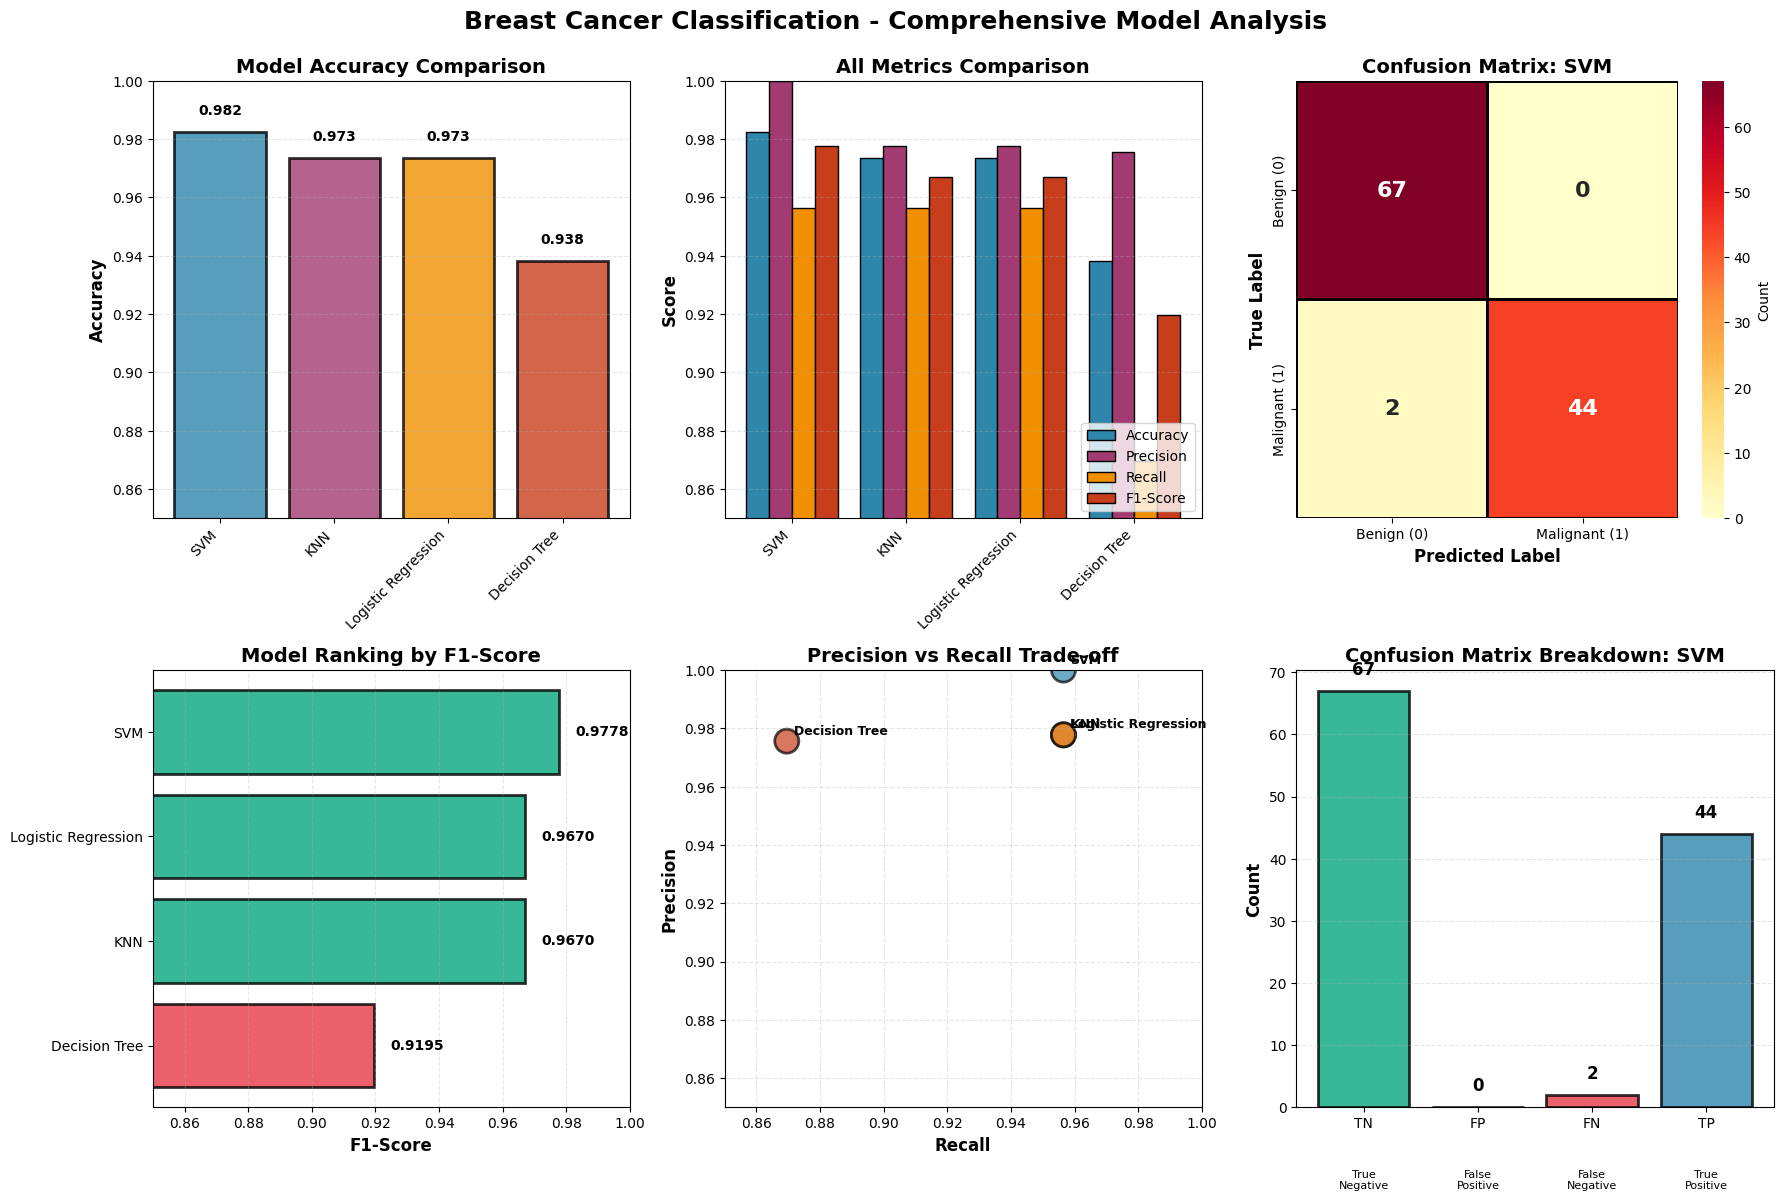

In [190]:
print("\nCreating visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Model Accuracy Comparison
ax1 = axes[0, 0]
models = comparison_df['Model']
accuracies = comparison_df['Accuracy']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
bars = ax1.bar(models, accuracies, color=colors, edgecolor='black', linewidth=2, alpha=0.8)
ax1.set_ylabel('Accuracy', fontweight='bold', fontsize=12)
ax1.set_title('Model Accuracy Comparison', fontweight='bold', fontsize=14)
ax1.set_ylim([0.85, 1.0])
ax1.grid(axis='y', alpha=0.3, linestyle='--')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. All Metrics Grouped Bar Chart
ax2 = axes[0, 1]
x = np.arange(len(models))
width = 0.2
ax2.bar(x - 1.5*width, comparison_df['Accuracy'], width, label='Accuracy', color='#2E86AB', edgecolor='black')
ax2.bar(x - 0.5*width, comparison_df['Precision'], width, label='Precision', color='#A23B72', edgecolor='black')
ax2.bar(x + 0.5*width, comparison_df['Recall'], width, label='Recall', color='#F18F01', edgecolor='black')
ax2.bar(x + 1.5*width, comparison_df['F1-Score'], width, label='F1-Score', color='#C73E1D', edgecolor='black')
ax2.set_ylabel('Score', fontweight='bold', fontsize=12)
ax2.set_title('All Metrics Comparison', fontweight='bold', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.legend(loc='lower right')
ax2.set_ylim([0.85, 1.0])
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# 3. Confusion Matrix - Best Model
ax3 = axes[0, 2]
if best_model_name == 'Decision Tree':
    best_metrics = metrics_dt
elif best_model_name == 'KNN':
    best_metrics = metrics_knn
elif best_model_name == 'Logistic Regression':
    best_metrics = metrics_lr
else:
    best_metrics = metrics_svm

cm = np.array([[best_metrics['tn'], best_metrics['fp']],
               [best_metrics['fn'], best_metrics['tp']]])
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', ax=ax3,
           cbar_kws={'label': 'Count'}, annot_kws={'fontsize': 16, 'fontweight': 'bold'},
           linewidths=2, linecolor='black')
ax3.set_xlabel('Predicted Label', fontweight='bold', fontsize=12)
ax3.set_ylabel('True Label', fontweight='bold', fontsize=12)
ax3.set_title(f'Confusion Matrix: {best_model_name}', fontweight='bold', fontsize=14)
ax3.set_xticklabels(['Benign (0)', 'Malignant (1)'])
ax3.set_yticklabels(['Benign (0)', 'Malignant (1)'])

# 4. F1-Score Ranking
ax4 = axes[1, 0]
sorted_df = comparison_df.sort_values('F1-Score')
colors_rank = ['#E63946' if x < 0.94 else '#F77F00' if x < 0.96 else '#06A77D'
              for x in sorted_df['F1-Score']]
bars = ax4.barh(sorted_df['Model'], sorted_df['F1-Score'],
               color=colors_rank, edgecolor='black', linewidth=2, alpha=0.8)
ax4.set_xlabel('F1-Score', fontweight='bold', fontsize=12)
ax4.set_title('Model Ranking by F1-Score', fontweight='bold', fontsize=14)
ax4.set_xlim([0.85, 1.0])
ax4.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax4.text(width + 0.005, bar.get_y() + bar.get_height()/2.,
            f'{width:.4f}', ha='left', va='center', fontweight='bold', fontsize=10)

# 5. Precision vs Recall
ax5 = axes[1, 1]
ax5.scatter(comparison_df['Recall'], comparison_df['Precision'],
           s=300, c=colors, edgecolors='black', linewidth=2, alpha=0.7)
for i, model in enumerate(comparison_df['Model']):
    ax5.annotate(model,
                (comparison_df['Recall'].iloc[i], comparison_df['Precision'].iloc[i]),
                xytext=(5, 5), textcoords='offset points',
                fontweight='bold', fontsize=9)
ax5.set_xlabel('Recall', fontweight='bold', fontsize=12)
ax5.set_ylabel('Precision', fontweight='bold', fontsize=12)
ax5.set_title('Precision vs Recall Trade-off', fontweight='bold', fontsize=14)
ax5.grid(True, alpha=0.3, linestyle='--')
ax5.set_xlim([0.85, 1.0])
ax5.set_ylim([0.85, 1.0])

# 6. Error Breakdown
ax6 = axes[1, 2]
error_types = ['TN', 'FP', 'FN', 'TP']
error_values = [best_metrics['tn'], best_metrics['fp'],
               best_metrics['fn'], best_metrics['tp']]
colors_error = ['#06A77D', '#F77F00', '#E63946', '#2E86AB']
bars = ax6.bar(error_types, error_values, color=colors_error,
              edgecolor='black', linewidth=2, alpha=0.8)
ax6.set_ylabel('Count', fontweight='bold', fontsize=12)
ax6.set_title(f'Confusion Matrix Breakdown: {best_model_name}',
             fontweight='bold', fontsize=14)
ax6.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels and descriptions
labels_desc = ['True\nNegative', 'False\nPositive', 'False\nNegative', 'True\nPositive']
for i, (bar, desc) in enumerate(zip(bars, labels_desc)):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{int(height)}', ha='center', va='bottom',
            fontweight='bold', fontsize=12)
    ax6.text(bar.get_x() + bar.get_width()/2., -10,
            desc, ha='center', va='top', fontsize=8)

plt.suptitle('Breast Cancer Classification - Comprehensive Model Analysis',
            fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

Clinincal Error

In [191]:
print(f"\nAnalyzing: {best_model_name}")

tn = best_metrics['tn']
fp = best_metrics['fp']
fn = best_metrics['fn']
tp = best_metrics['tp']

print(f"\nConfusion Matrix Components:")
print(f"  True Negatives (Benign correctly identified):      {tn:3d}")
print(f"  False Positives (Benign misclassified):            {fp:3d}")
print(f"  False Negatives (Malignant misclassified):         {fn:3d}  [CRITICAL]")
print(f"  True Positives (Malignant correctly identified):   {tp:3d}")

# Calculate error rates
fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"\nClinical Metrics:")
print(f"  Sensitivity (True Positive Rate):  {sensitivity:.4f} ({sensitivity*100:.2f}%)")
print(f"  Specificity (True Negative Rate):  {specificity:.4f} ({specificity*100:.2f}%)")
print(f"  False Negative Rate:               {fnr:.4f} ({fnr*100:.2f}%)")
print(f"  False Positive Rate:               {fpr:.4f} ({fpr*100:.2f}%)")

print("\nMEDICAL IMPLICATIONS")

print(f"\n FALSE NEGATIVES ({fn} cases): MOST CRITICAL")
print("   Impact:")
print("   • Malignant tumors classified as benign")
print("   • Delayed diagnosis and treatment")
print("   • Potentially life-threatening consequences")
print("   • Reduced patient survival rates")
print("   • Legal and ethical implications")

print(f"\n FALSE POSITIVES ({fp} cases): LESS SEVERE")
print("   Impact:")
print("   • Benign tumors classified as malignant")
print("   • Unnecessary anxiety for patients")
print("   • Additional diagnostic procedures (biopsies)")
print("   • Increased healthcare costs")
print("   • Patient psychological distress")

print(f"\n CLINICAL RECOMMENDATIONS:")
if fnr < 0.03:
    print("   Excellent: FN rate < 3% is clinically acceptable")
elif fnr < 0.05:
    print("   Good: FN rate < 5% is within acceptable range")
else:
    print("   Concerning: FN rate > 5% may require threshold adjustment")

print(f"\n DEPLOYMENT STRATEGY:")
print("   1. Use as first-line screening tool, not final diagnosis")
print("   2. All positive predictions require clinical confirmation")
print("   3. Borderline cases (confidence < 80%) flagged for review")
print("   4. Combine with radiologist expert judgment")
print("   5. Regular model performance monitoring and retraining")



Analyzing: SVM

Confusion Matrix Components:
  True Negatives (Benign correctly identified):       67
  False Positives (Benign misclassified):              0
  False Negatives (Malignant misclassified):           2  [CRITICAL]
  True Positives (Malignant correctly identified):    44

Clinical Metrics:
  Sensitivity (True Positive Rate):  0.9565 (95.65%)
  Specificity (True Negative Rate):  1.0000 (100.00%)
  False Negative Rate:               0.0435 (4.35%)
  False Positive Rate:               0.0000 (0.00%)

MEDICAL IMPLICATIONS

 FALSE NEGATIVES (2 cases): MOST CRITICAL
   Impact:
   • Malignant tumors classified as benign
   • Delayed diagnosis and treatment
   • Potentially life-threatening consequences
   • Reduced patient survival rates
   • Legal and ethical implications

 FALSE POSITIVES (0 cases): LESS SEVERE
   Impact:
   • Benign tumors classified as malignant
   • Unnecessary anxiety for patients
   • Additional diagnostic procedures (biopsies)
   • Increased healthcare c

Feature Importance



        Feature  Importance
concave_points3    0.222222
        radius1    0.111111
          area2    0.111111
     perimeter3    0.111111
        radius3    0.111111
    smoothness1    0.111111
       texture3    0.111111
          area3    0.111111


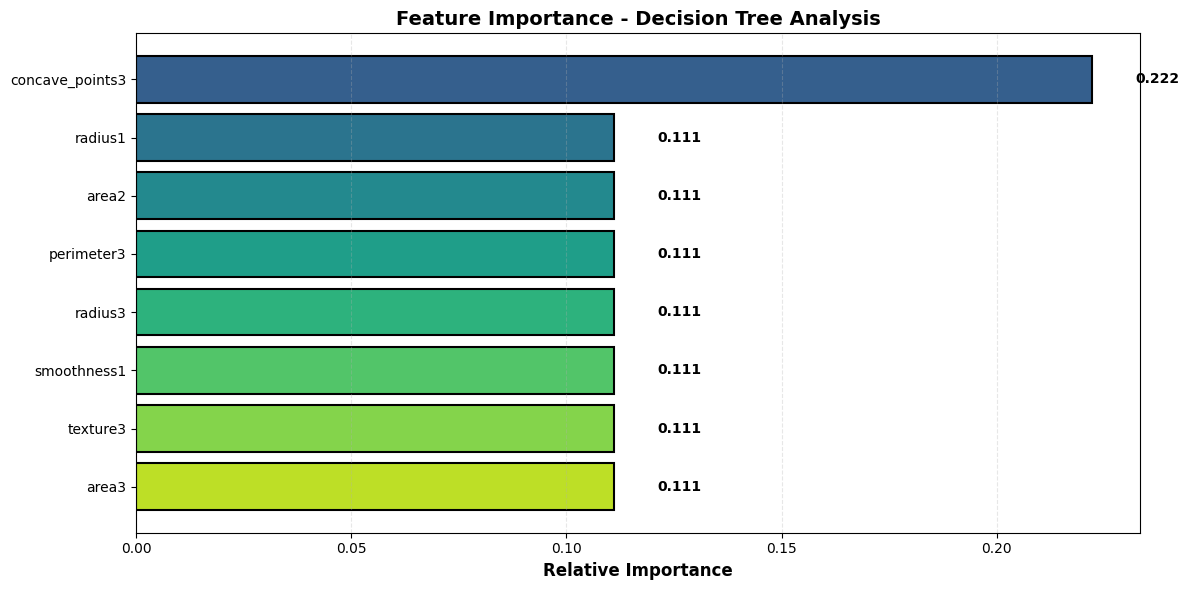


 Feature importance analysis complete!

 Top 3 Most Important Features:
   28. concave_points3: 0.2222
   1. radius1: 0.1111
   14. area2: 0.1111


In [195]:
def extract_feature_importance_recursive(tree, feature_names):
    """Extract feature importance from decision tree by counting usage."""
    importance_dict = {feature: 0 for feature in feature_names}

    def traverse(node, depth=0):
        if node.value is not None:  # Leaf node
            return

        feature_name = feature_names[node.feature]
        importance_dict[feature_name] += 1

        if node.left:
            traverse(node.left, depth + 1)
        if node.right:
            traverse(node.right, depth + 1)

    traverse(tree.root)

    # Normalize
    total = sum(importance_dict.values())
    if total > 0:
        for key in importance_dict:
            importance_dict[key] /= total

    return importance_dict

# Get feature names
feature_names = X_train.columns.tolist()

# Calculate importance
importance = extract_feature_importance_recursive(dt, feature_names)
importance_df = pd.DataFrame(list(importance.items()),
                             columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df = importance_df[importance_df['Importance'] > 0]  # Only used features

print("\n")
print(importance_df.to_string(index=False))

# Visualize
plt.figure(figsize=(12, 6))
colors_feat = plt.cm.viridis(np.linspace(0.3, 0.9, len(importance_df)))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'],
        color=colors_feat, edgecolor='black', linewidth=1.5)
plt.xlabel('Relative Importance', fontweight='bold', fontsize=12)
plt.title('Feature Importance - Decision Tree Analysis',
         fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2.,
            f'{width:.3f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n Feature importance analysis complete!")
print("\n Top 3 Most Important Features:")
for i, row in importance_df.head(3).iterrows():
    print(f"   {i+1}. {row['Feature']}: {row['Importance']:.4f}")